<IPython.core.display.Javascript object>


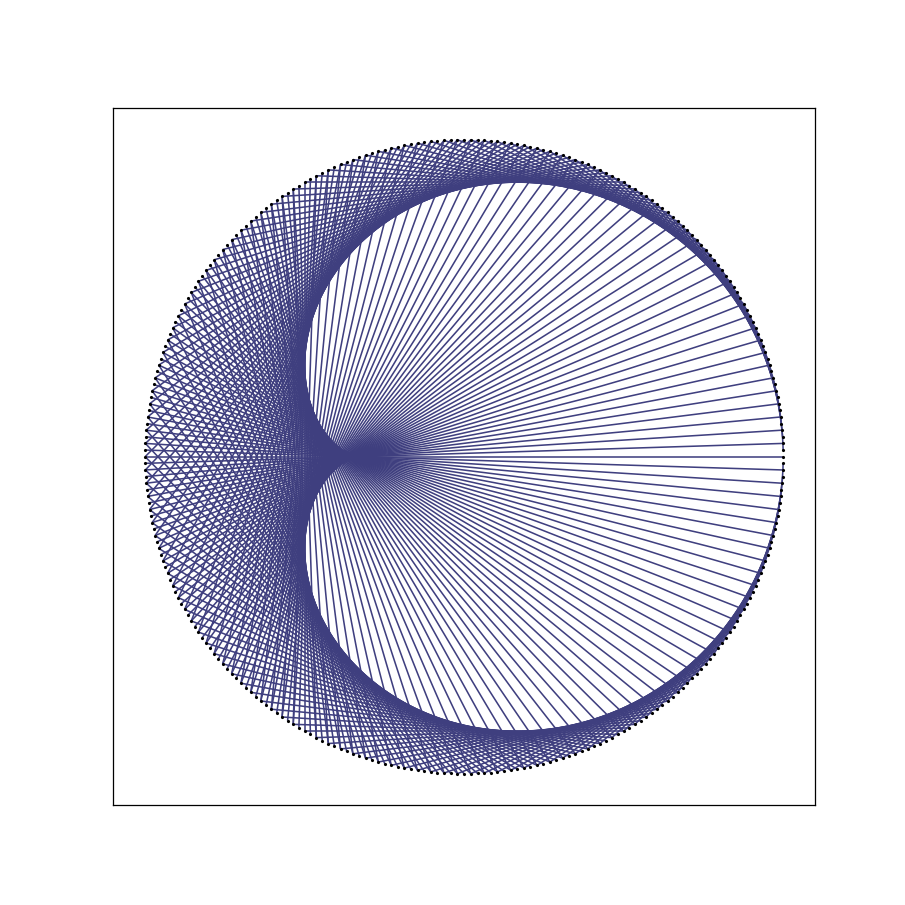

<IPython.core.display.Javascript object>


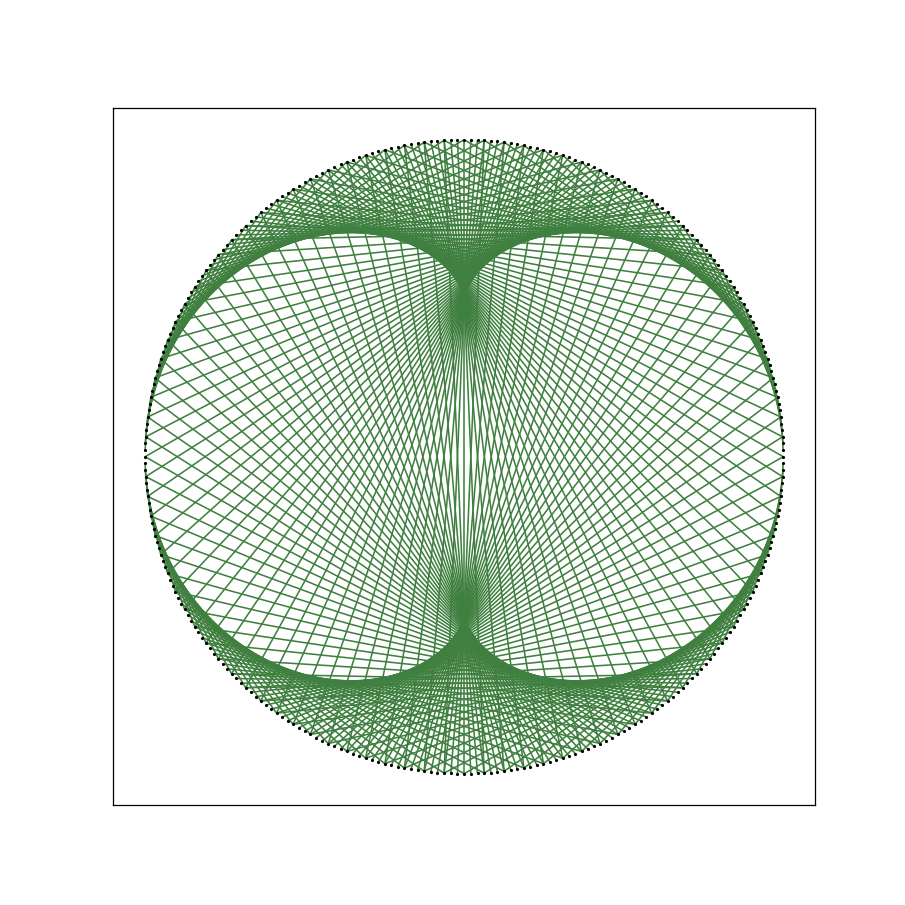

<IPython.core.display.Javascript object>


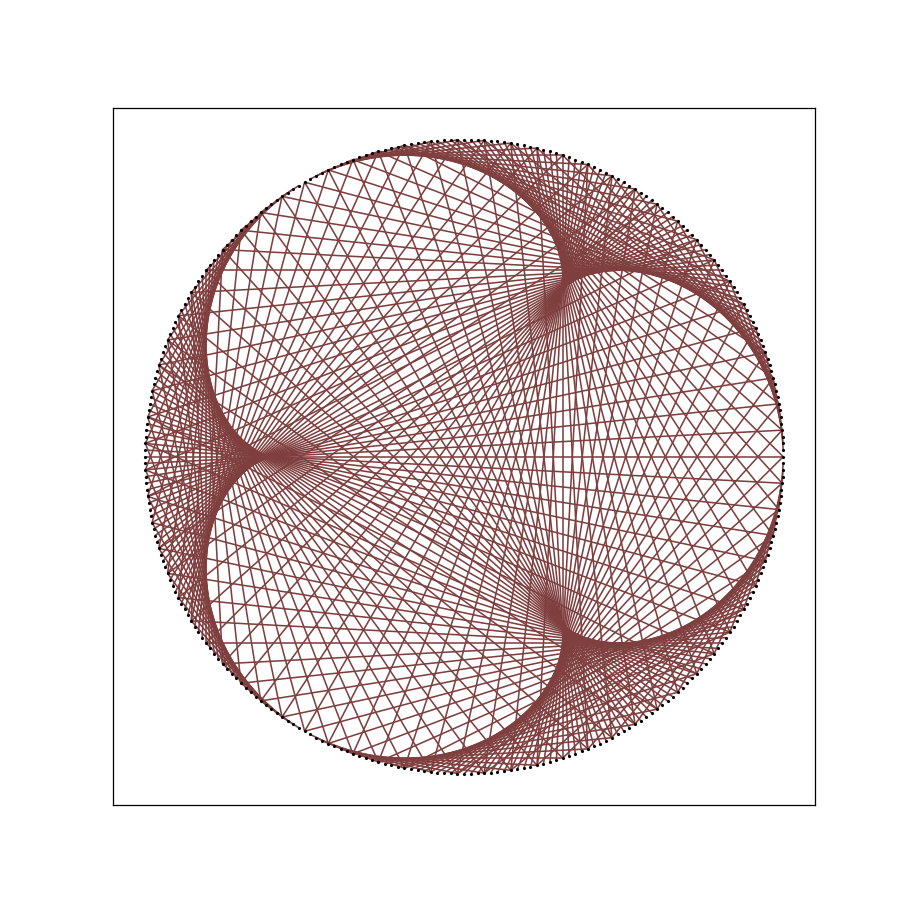

In [1]:
#Python code for creating timetables aka cardioid graphs
import matplotlib.pyplot as plt
import networkx as nx
import warnings
import colorsys

%matplotlib notebook
warnings.filterwarnings("ignore")

#get a list of colors in hex format to color the graphs
def get_N_HexCol(N):
    HSV_tuples = [(x * 1.0 / N, 0.5, 0.5) for x in range(N)]
    hex_out = []
    for rgb in HSV_tuples:
        rgb = map(lambda x: int(x * 255), colorsys.hsv_to_rgb(*rgb))
        hex_out.append('#%02x%02x%02x' % tuple(rgb))
    return hex_out

#factor range (low_b, up_b)
low_b = 2
up_b = 5
colors = get_N_HexCol(up_b - low_b)
#number of nodes in graph
n = 300

for factor in range(low_b,up_b):
    G = nx.Graph()
    edges = []
    #for every node in graph
    for node in range(1,n):
        #if node*factor lies with in the graph nodes then create an edge i-->i*factor
        if node*factor < n:
            G.add_edge(node,node*factor)
        #else reduce i*factor into (0,n-1) and add edge
        else:
            to = node*factor-n
            while to >= n:
                to = to - n
            G.add_edge(node,to)
    
    #get coordinate positions for evenly distribued n points in circular layout
    pos = nx.circular_layout(range(0,n))
    plt.figure(figsize=(8,8))
    nx.draw_networkx(G, pos=pos, node_size=1, node_color='black', with_labels=False, edge_color=colors[up_b-factor-1])
    #plt.savefig("figure"+str(factor)+".png", bbox_inches="tight")